In [13]:
from langchain_core.messages import HumanMessage, AIMessage


In [14]:
messages = [AIMessage(content="Hello, how can I assist you today?", name="Model")]
messages.append(HumanMessage(content="Can you tell me a joke?", name="Sampath"))

In [15]:
messages.append(AIMessage(content="What kind of Joke?", name="Model"))
messages.append(HumanMessage(content="Can you tell me a joke for kid?", name="Sampath"))

In [11]:
messages
for m in messages:
    m.pretty_print()


NameError: name 'messages' is not defined

In [9]:

import dotenv

dotenv.load_dotenv()


True

In [17]:
from langchain_groq import ChatGroq
chat = ChatGroq(model="openai/gpt-oss-120b", temperature=0.7)
response = chat.invoke(messages)
print(response)


content='Sure! Here’s a kid‑friendly joke:\n\n**Why did the scarecrow win an award?**  \nBecause he was outstanding **in his field**! 🌾😄' additional_kwargs={'reasoning_content': 'User wants a kid-friendly joke. Provide a simple, clean joke.'} response_metadata={'token_usage': {'completion_tokens': 60, 'prompt_tokens': 117, 'total_tokens': 177, 'completion_time': 0.125432659, 'completion_tokens_details': {'reasoning_tokens': 15}, 'prompt_time': 0.033752501, 'prompt_tokens_details': None, 'queue_time': 0.085134355, 'total_time': 0.15918516}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_c82faf3ca0', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None, 'model_provider': 'groq'} id='lc_run--019b32cf-fa83-7203-92a2-aa0d4b8dcba1-0' usage_metadata={'input_tokens': 117, 'output_tokens': 60, 'total_tokens': 177, 'output_token_details': {'reasoning': 15}}


In [18]:
type(response)

langchain_core.messages.ai.AIMessage

In [ ]:
#Tools

In [12]:
def multiply(a,b)->int:
    """ Multiplies two numbers """
    return a * b

In [28]:
llm_with_tools = chat.bind_tools([multiply])

In [30]:
toolcall = llm_with_tools.invoke([HumanMessage(content="What is 3 * 6?")])
print(toolcall)


content='' additional_kwargs={'reasoning_content': 'User asks "What is 3 * 6?" Simple multiplication. Could compute mentally: 18. Could also use function multiply. Let\'s use function.', 'tool_calls': [{'id': 'fc_6b741383-51a3-432a-8eb3-92c1edbd3aec', 'function': {'arguments': '{"a":3,"b":6}', 'name': 'multiply'}, 'type': 'function'}]} response_metadata={'token_usage': {'completion_tokens': 65, 'prompt_tokens': 130, 'total_tokens': 195, 'completion_time': 0.13075506, 'completion_tokens_details': {'reasoning_tokens': 32}, 'prompt_time': 0.006372655, 'prompt_tokens_details': None, 'queue_time': 0.365416832, 'total_time': 0.137127715}, 'model_name': 'openai/gpt-oss-120b', 'system_fingerprint': 'fp_4b2f03d631', 'service_tier': 'on_demand', 'finish_reason': 'tool_calls', 'logprobs': None, 'model_provider': 'groq'} id='lc_run--019b32da-b829-7202-8405-309084526ad7-0' tool_calls=[{'name': 'multiply', 'args': {'a': 3, 'b': 6}, 'id': 'fc_6b741383-51a3-432a-8eb3-92c1edbd3aec', 'type': 'tool_call'

In [8]:
from langgraph.graph import MessagesState


In [36]:
class MessagesState(MessagesState):
    pass

In [6]:
from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END

In [4]:
def tool_calling_llm(state : MessagesState):

    return {"messages": [llm_with_tools.invoke(state["messages"])]}

In [39]:
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_edge(START, "tool_calling_llm")
builder.add_edge("tool_calling_llm", END)
graph = builder.compile()

In [10]:
from langgraph.prebuilt import ToolNode, tools_condition ###

In [ ]:
builder = StateGraph(MessagesState)
builder.add_node("tool_calling_llm", tool_calling_llm)
builder.add_node("tools",ToolNode[multiply])
builder.add_edge(START,"tool_calling_llm")
builder.add_conditional_edges (
    "tool_calling_llm",
    tools_condition
)

builder.add_edge("tools", END)
graph = builder.compile()



TypeError: 'function' object is not iterable

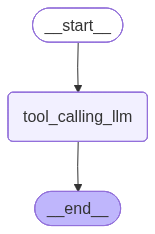

In [43]:
display(Image(graph.get_graph().draw_mermaid_png()))

In [45]:

messages = graph.invoke({"messages": [HumanMessage(content="What is 3 * 6?")]})
for m in messages['messages']:
    m.pretty_print()    

================================ Human Message =================================

What is 3 * 6?
================================== Ai Message ==================================

3 × 6 = 18.


In [46]:
messages = graph.invoke({"messages": [HumanMessage(content="Multiply 2 and 3")]})
for m in messages['messages']:
    m.pretty_print()   

================================ Human Message =================================

Multiply 2 and 3
================================== Ai Message ==================================
Tool Calls:
  multiply (fc_50d1f5d5-5331-43be-8a45-0a7c59d1d356)
 Call ID: fc_50d1f5d5-5331-43be-8a45-0a7c59d1d356
  Args:
    a: 2
    b: 3


In [ ]:
#Router Agent